# Five Personality Traits Clustering with K-Means 
# Assignment 3

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)


This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. You can see more from https://www.kaggle.com/datasets/tunguz/big-five-personality-test 


The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can see the questions in the codebook.txt or at the https://ipip.ori.org/new_ipip-50-item-scale.htm website and from the Goldberg paper 

Resources:

[1].Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

[2]https://openpsychometrics.org/tests/IPIP-BFFM/




In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Data Set
The dataset is quite big, it might take a while.

In [3]:
data = pd.read_csv('data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()


Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


## Understanding the Data Set

In [4]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [5]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [6]:
#Load in questions databank
import json
with open("data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [7]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

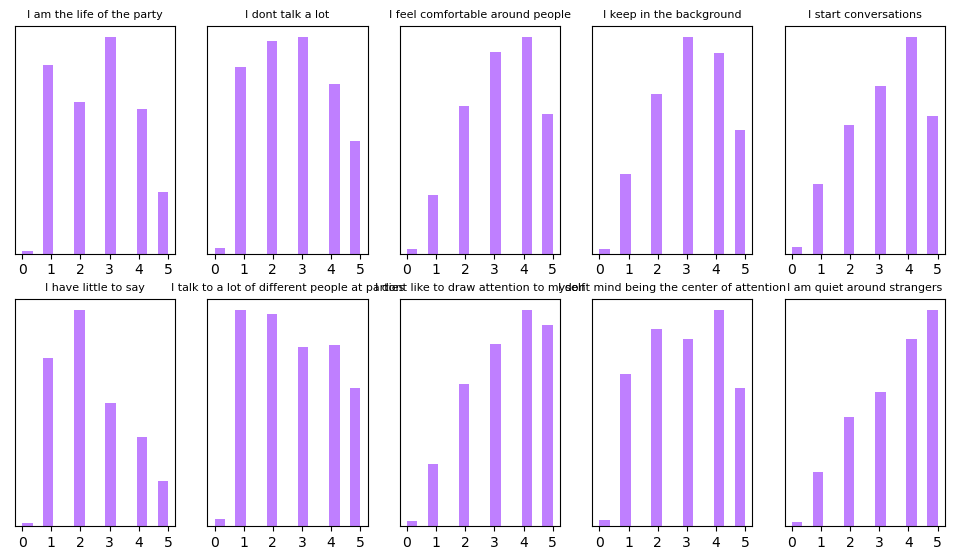

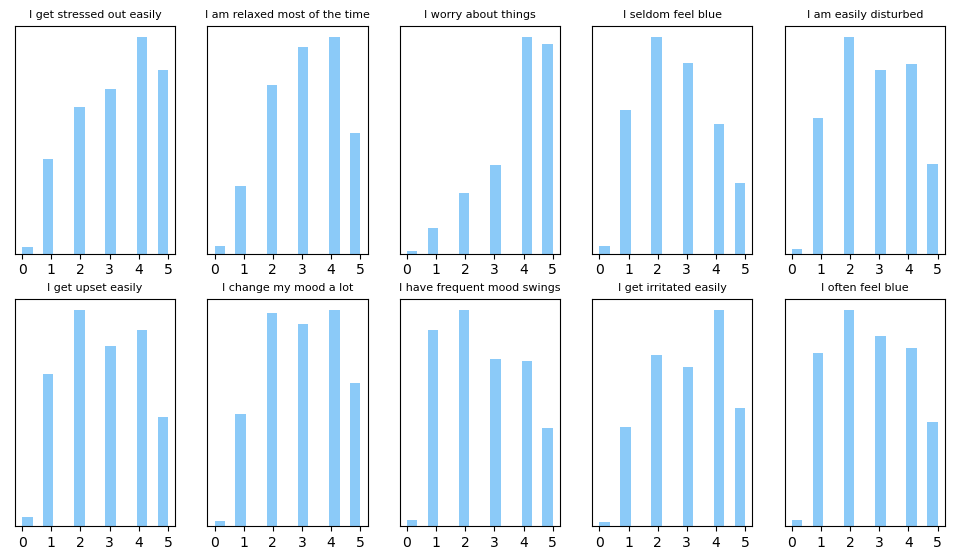

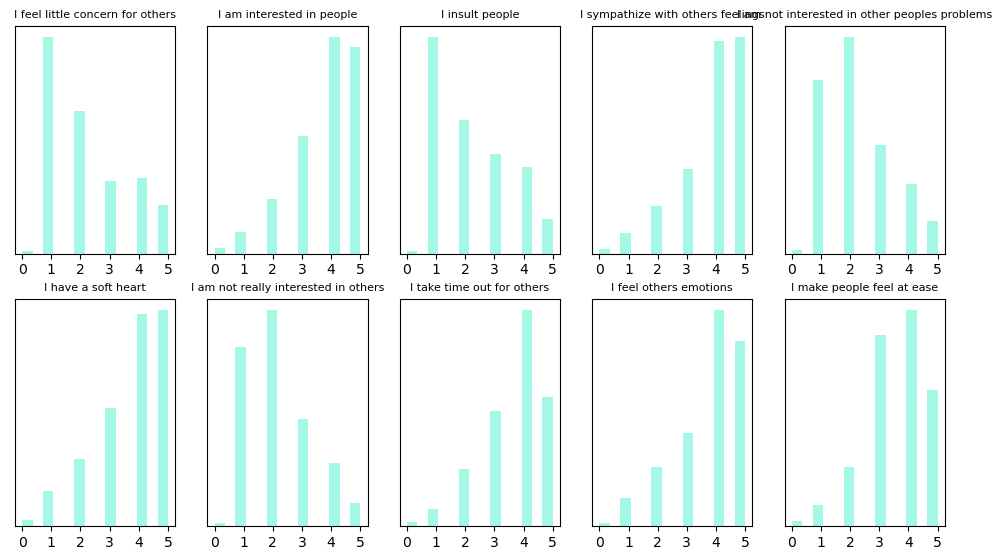

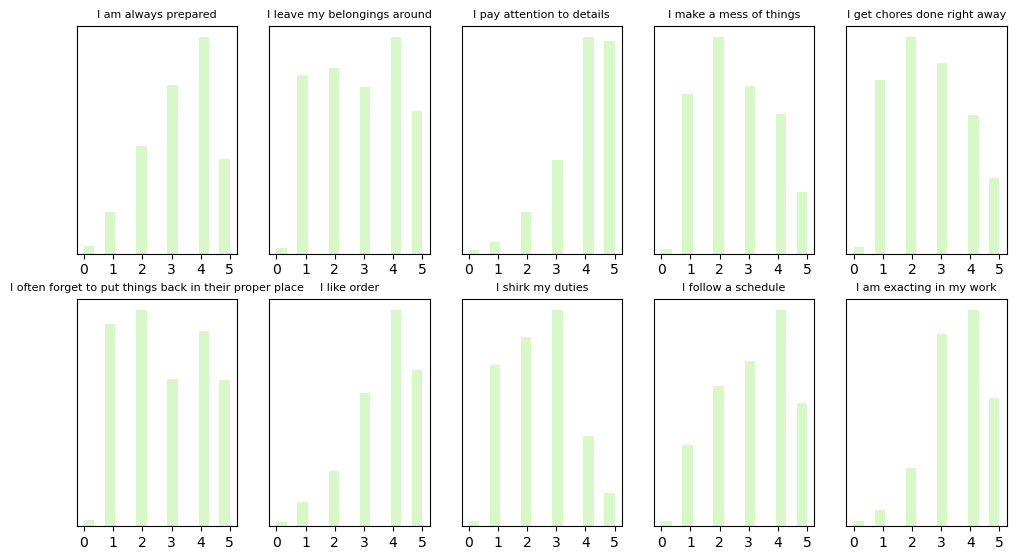

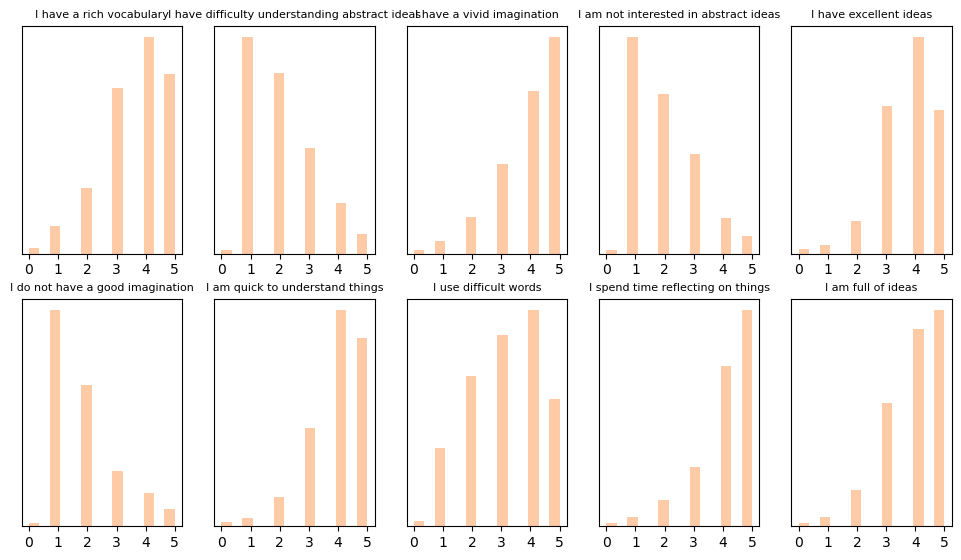

In [8]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5)) 

## How many clusters should we define?

Clustering is a task of identifying similar instances and assigning them to clusters or groups of similar interest. (Geron, 2023)

In [9]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [10]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [11]:
import warnings
warnings.filterwarnings("ignore")

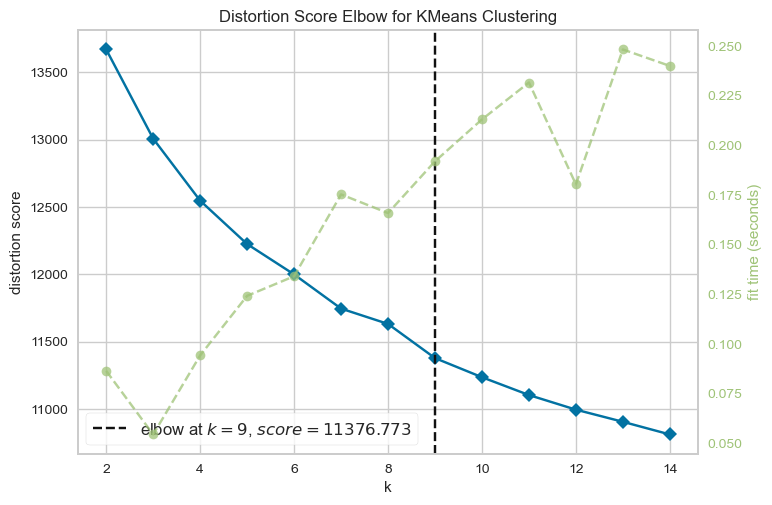

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this research is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups



## K-Means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [13]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [14]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,2
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,0
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,2
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,3
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,3


## Analysing the Model and Predictions

How many individuals do we have for each cluster?

In [15]:
df_model.Clusters.value_counts()

1    10371
4    10130
2     9998
0     9804
3     9603
Name: Clusters, dtype: int64

Let's group the results according to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [16]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,717495.622297,2.637495,2.765708,3.248776,3.140555,3.264382,2.348327,2.738372,3.393105,2.966238,3.560282,3.290086,3.119645,3.841289,2.619441,2.822215,2.825581,3.049980,2.697980,3.103427,2.804468,2.221338,3.833027,2.288862,3.929825,2.279682,3.716136,2.197980,3.680641,3.774786,3.580579,3.311608,2.977764,3.980518,2.613729,2.592513,2.859853,3.681457,2.458078,3.180029,3.605059,3.719604,1.991024,4.026724,1.909119,3.830375,1.877193,4.005916,3.286822,4.194818,4.004998
1,104517.171632,2.624723,2.823643,3.270273,3.189856,3.239900,2.503230,2.765693,3.444316,2.977148,3.585479,3.216758,3.248288,3.828464,2.680937,2.807251,2.828657,3.054961,2.660592,3.102208,2.757111,2.299489,3.788931,2.353871,3.890271,2.308167,3.720181,2.238839,3.650082,3.741973,3.544113,3.264873,2.964131,3.933854,2.641307,2.563012,2.846302,3.675634,2.505544,3.147237,3.547970,3.639765,2.109633,3.987658,2.069617,3.753833,1.922283,3.969820,3.156590,4.078488,3.910520
2,516321.089718,2.645029,2.757952,3.282657,3.125425,3.285357,2.402280,2.787257,3.419384,2.979096,3.532106,3.287457,3.167934,3.834267,2.677435,2.843069,2.833567,3.042909,2.673135,3.090118,2.779256,2.277355,3.831066,2.252551,3.910382,2.251650,3.741448,2.200540,3.684437,3.781656,3.601120,3.288958,2.899280,3.994399,2.598120,2.643729,2.822164,3.718344,2.470794,3.210742,3.589918,3.646329,2.064013,4.004801,1.990198,3.817564,1.894179,3.967794,3.191138,4.126325,3.986497
3,914746.261481,2.663751,2.745913,3.325003,3.132875,3.315110,2.332396,2.788920,3.393315,2.973550,3.541914,3.296574,3.139123,3.864834,2.631886,2.829949,2.830678,3.034260,2.667708,3.052588,2.780694,2.193585,3.877226,2.176611,3.973133,2.239717,3.775070,2.164948,3.730397,3.824742,3.621368,3.358534,2.910132,3.993231,2.546600,2.687285,2.775903,3.750391,2.392586,3.271269,3.643757,3.702281,2.029158,4.007394,1.926794,3.837030,1.870249,4.012913,3.225242,4.179527,3.992711
4,311978.410958,2.672655,2.759329,3.296841,3.144719,3.291609,2.430207,2.799506,3.423100,2.956861,3.538697,3.323001,3.147779,3.887364,2.713425,2.894274,2.900691,3.091214,2.734057,3.107996,2.772853,2.327443,3.821323,2.259724,3.935439,2.272754,3.772458,2.192794,3.693189,3.813722,3.611451,3.279961,2.924975,3.995262,2.668312,2.692103,2.859230,3.686081,2.491115,3.194571,3.588351,3.610661,2.176308,3.987759,2.099605,3.759625,1.911945,3.939783,3.106120,4.074432,3.933268


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [17]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.650296,3.092993,3.072674,3.123613,3.244665
1,2.683878,3.101360,3.074892,3.108601,3.223566
2,2.668444,3.098200,3.071034,3.124765,3.229226
3,2.667083,3.088951,3.073612,3.130730,3.243434
4,2.677483,3.133850,3.086170,3.140306,3.225459


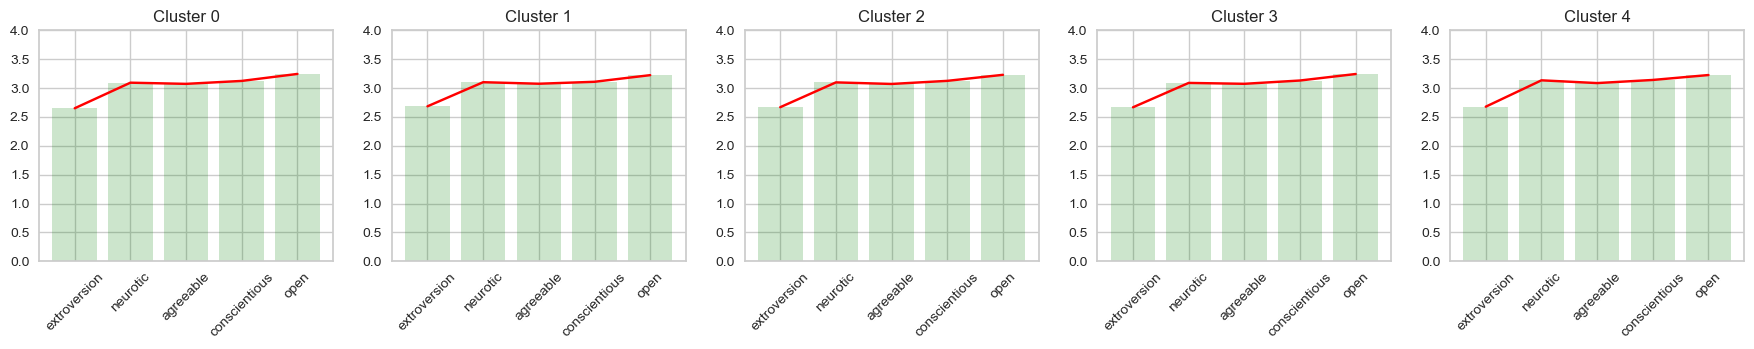

In [18]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

## Visualizing the Cluster Predictions

## PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [19]:
# In order to visualize in 2D graph, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698173,0.313895,2
1,305914.698172,2.160718,0
2,-55301.301828,-3.926731,2
3,413620.698171,3.319434,3
4,388961.698173,-0.852535,3


Text(0.5, 1.0, 'Personality Clusters after PCA')

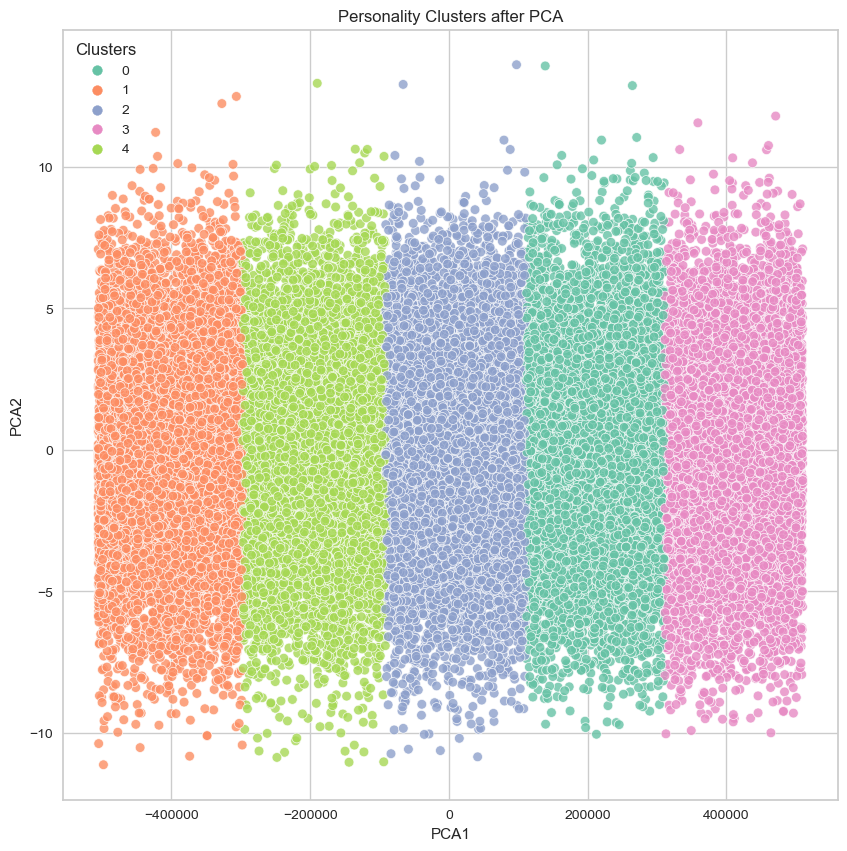

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [21]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [22]:
my_data = pd.read_csv('data/data_personality.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [23]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
# my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.4,3.3,3.4


# In class exercise 
 Make an excel sheet that contains your answers to the Big Five Personality Questionnaires. You can see the template in my_data 

 The way you create your data is by answering the Big Five Personality (on the scale 1 - 5 with 1 being very inacccurate to 5 very accurate) for all the questions. Save as excel or csv and input it with the corect path. You can also see the template for filling out the questionnaire here: https://artslondon-my.sharepoint.com/:x:/g/personal/u_octaviani_arts_ac_uk/EW3hJdb8R9lEt3TzFYlZRwEBT6m9zt5ov7uJJsDXFVmCTA?e=YzUfwH

As a reminder the questions are : https://ipip.ori.org/new_ipip-50-item-scale.htm 

In [24]:
# optional if you use excel. Use: pip install openpyxl
lucy_data = pd.read_csv(r'C:\Users\luoco\Documents\Personalisation-22-23\data\lucy_data_personality.csv')

In [25]:
# Change this to your data

col_list = list(lucy_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

lucy_sums = pd.DataFrame()
lucy_sums['extroversion'] = lucy_data[ext].sum(axis=1)/10
lucy_sums['neurotic'] = lucy_data[est].sum(axis=1)/10
lucy_sums['agreeable'] = lucy_data[agr].sum(axis=1)/10
lucy_sums['conscientious'] = lucy_data[csn].sum(axis=1)/10
lucy_sums['open'] = lucy_data[opn].sum(axis=1)/10
print('Sum of my question groups')
lucy_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,2.8,2.8,3.2,3.6,3.5


# Assignment 3





# Tasks

In the questions, there is a clear self judgement bias where positive attributes (“I have a rich vocabulary) are rated higher than negative ones (“I do not have a good imagination”). This is demonstrated by steep negative or positive skews in the data 

A variety of these within a trait balances itself out as we can see by the 5 personality types all having reasonably similar means (~3)

## Task 1

Create 5 means for each traits for the whole dataset.

Each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

**TIPS**
You can use ``keys_for_trait()`` to slice out all the questions for a particular trait

### The following code presents MEANS for each trait across the whole dataset.


In [26]:
df = pd.read_csv('data/data-small.csv')
df

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,777508,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,US
49996,571162,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,PL
49997,691344,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,US
49998,347331,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,CA


In [27]:
#dropping unnamed column
df = df.drop("Unnamed: 0",axis = 1)

In [28]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,US
49996,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,PL
49997,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,US
49998,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,CA


In [29]:
#dividing the data to each 10 questions

#extroversion
df_ext = pd.DataFrame(df, columns = ['EXT1', 'EXT2', 'EXT3', 'EXT4','EXT5','EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10'])
df_ext

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0
1,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0
2,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0
3,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0
4,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0
49996,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0
49997,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0
49998,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0


In [30]:
#taking the mean for each column of the 'ext's'
df_ext[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5',  'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']].mean(axis=0)

EXT1     2.648487
EXT2     2.771108
EXT3     3.284452
EXT4     3.147185
EXT5     3.278782
EXT6     2.404849
EXT7     2.776077
EXT8     3.415147
EXT9     2.970507
EXT10    3.551974
dtype: float64

## EXTROVERSION MEAN

In [31]:
#taking the mean across the whole dataset for EXT
Extroversion = df_ext[['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5',  'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']].mean(axis=0)
Extroversion.mean()

3.0248567421358445

In [32]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,US
49996,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,PL
49997,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,US
49998,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,CA


In [33]:
##repeating the process above for each of the traits/factors##

#neuroticism
df_neu = pd.DataFrame(df, columns = ['EST1', 'EST2', 'EST3','EST4','EST5','EST6', 'EST7','EST8','EST9','EST10'])
df_neu

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0
1,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0
2,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0
3,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
49995,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0
49996,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0
49997,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0
49998,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0


In [34]:
df_neu[['EST1', 'EST2', 'EST3','EST4','EST5','EST6', 'EST7','EST8','EST9','EST10']].mean(axis=0)

EST1     3.282168
EST2     3.165558
EST3     3.851092
EST4     2.665318
EST5     2.839411
EST6     2.844019
EST7     3.054899
EST8     2.686716
EST9     3.091685
EST10    2.778601
dtype: float64

## NEUROTICISM MEAN

In [35]:
Neuroticism = df_neu[['EST1', 'EST2', 'EST3','EST4','EST5','EST6', 'EST7','EST8','EST9','EST10']].mean(axis=0)
Neuroticism.mean()

3.0259467040673216

In [36]:
#agreeableness
df_agr = pd.DataFrame(df, columns = ['AGR1', 'AGR2', 'AGR3','AGR4','AGR5','AGR6', 'AGR7','AGR8','AGR9','AGR10'])
df_agr

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0
1,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0
2,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0
3,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0
4,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0
49996,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0
49997,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0
49998,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0


In [40]:
df_agr[['AGR1', 'AGR2', 'AGR3','AGR4','AGR5','AGR6', 'AGR7','AGR8','AGR9','AGR10']].mean(axis=0)

AGR1     2.264957
AGR2     3.829653
AGR3     2.267642
AGR4     3.927209
AGR5     2.270848
AGR6     3.744861
AGR7     2.199579
AGR8     3.687197
AGR9     3.786876
AGR10    3.591264
dtype: float64

## AGREEABLENESS MEAN

In [41]:
Agreeableness = df_agr[['AGR1', 'AGR2', 'AGR3','AGR4','AGR5','AGR6', 'AGR7','AGR8','AGR9','AGR10']].mean(axis=0)
Agreeableness.mean()

3.1570086155079142

In [42]:
#conscientiousness
df_con = pd.DataFrame(df, columns = ['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10'])
df_con

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0
1,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0
2,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0
3,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0
4,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0
49996,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0
49997,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0
49998,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0


In [43]:
df_con[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']].mean(axis=0)

CSN1     3.299980
CSN2     2.935544
CSN3     3.979042
CSN4     2.614566
CSN5     2.635043
CSN6     2.833240
CSN7     3.701903
CSN8     2.464656
CSN9     3.199940
CSN10    3.594190
dtype: float64

## CONSCIENTIOUSNESS MEAN

In [44]:
Conscientiousness = df_con[['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']].mean(axis=0)
Conscientiousness.mean()

3.125810458825887

In [45]:
#openess
df_opn = pd.DataFrame(df, columns = ['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10'])
df_opn

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0
1,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0
2,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0
4,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0
49996,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0
49997,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0
49998,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0


In [46]:
df_opn[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']].mean(axis=0)

OPN1     3.662873
OPN2     2.075255
OPN3     4.002625
OPN4     2.000801
OPN5     3.798858
OPN6     1.895632
OPN7     3.978662
OPN8     3.192026
OPN9     4.129593
OPN10    3.964716
dtype: float64

## OPENNESS MEAN

In [47]:
openness = df_opn[['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']].mean(axis=0)
openness.mean()

3.270104187537568

### All of the means across the whole dataset together:

In [48]:
print('The Extroversion mean is', Extroversion.mean()) 
print('The Neuroticism mean is', Neuroticism.mean())
print('The Agreeableness mean is', Agreeableness.mean())
print('The Conscientiousness mean is', Conscientiousness.mean())
print('The Openness mean is', openness.mean())

The Extroversion mean is 3.0248567421358445
The Neuroticism mean is 3.0259467040673216
The Agreeableness mean is 3.1570086155079142
The Conscientiousness mean is 3.125810458825887
The Openness mean is 3.270104187537568


## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question. 

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly 

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

In [101]:
# REFERENCE
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [53]:
from scipy.stats import skew
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,US
49996,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,PL
49997,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,US
49998,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,CA


#### Below sees all of the skew data from each column of the dataset.

In [66]:
#See the skew across each column when we say (axis = 0)
#Each column is representative of a question.

skew_data = df.skew(axis=0, skipna = True)
skew_data

EXT1     0.149347
EXT2     0.152599
EXT3    -0.279308
EXT4    -0.179494
EXT5    -0.373238
EXT6     0.548961
EXT7     0.150509
EXT8    -0.389443
EXT9    -0.048694
EXT10   -0.539962
EST1    -0.327328
EST2    -0.221833
EST3    -0.953500
EST4     0.237787
EST5     0.075607
EST6     0.048300
EST7    -0.072354
EST8     0.224364
EST9    -0.166165
EST10    0.137283
AGR1     0.707455
AGR2    -0.935521
AGR3     0.593736
AGR4    -1.099004
AGR5     0.682961
AGR6    -0.863041
AGR7     0.712440
AGR8    -0.793810
AGR9    -0.903511
AGR10   -0.620805
CSN1    -0.470776
CSN2    -0.029610
CSN3    -1.063218
CSN4     0.273903
CSN5     0.260955
CSN6     0.111747
CSN7    -0.781714
CSN8     0.280073
CSN9    -0.287715
CSN10   -0.595496
OPN1    -0.711990
OPN2     0.811215
OPN3    -1.087772
OPN4     0.892810
OPN5    -0.810007
OPN6     1.157433
OPN7    -1.118518
OPN8    -0.262734
OPN9    -1.368370
OPN10   -0.939672
dtype: float64

##### I will the divide this up between all of the traits. We can then see the skew visually for all the 10 questions within in trait.

### Extraversion skew data

In [68]:
#Extraversion skew
ext_skew = skew_data[0:10]
ext_skew

EXT1     0.149347
EXT2     0.152599
EXT3    -0.279308
EXT4    -0.179494
EXT5    -0.373238
EXT6     0.548961
EXT7     0.150509
EXT8    -0.389443
EXT9    -0.048694
EXT10   -0.539962
dtype: float64

count    10.000000
mean     -0.080872
std       0.333222
min      -0.539962
25%      -0.349756
50%      -0.114094
75%       0.150218
max       0.548961
dtype: float64

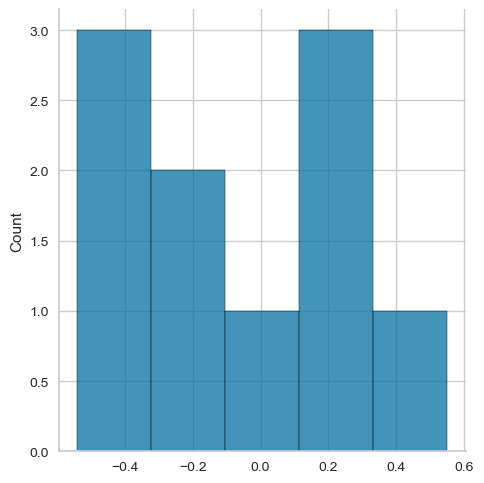

In [92]:
sns.displot(ext_skew)
ext_skew.describe()

### Neuroticism skew data

In [70]:
#neuroticism skew
est_skew = skew_data[10:20]
est_skew

EST1    -0.327328
EST2    -0.221833
EST3    -0.953500
EST4     0.237787
EST5     0.075607
EST6     0.048300
EST7    -0.072354
EST8     0.224364
EST9    -0.166165
EST10    0.137283
dtype: float64

count    10.000000
mean     -0.101784
std       0.354109
min      -0.953500
25%      -0.207916
50%      -0.012027
75%       0.121864
max       0.237787
dtype: float64

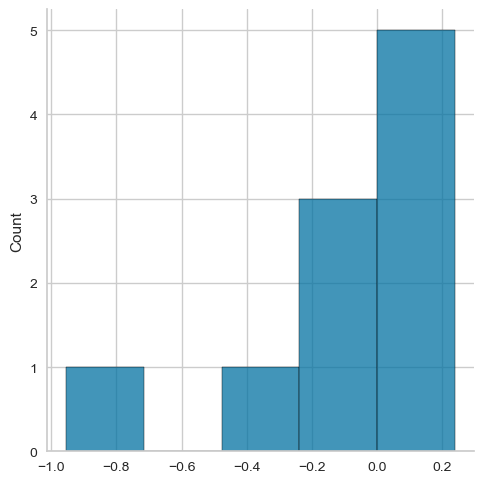

In [94]:
sns.displot(est_skew)
est_skew.describe()

### Agreeableness skew data

In [72]:
#agreeableness skew
agr_skew = skew_data[20:30]
agr_skew

AGR1     0.707455
AGR2    -0.935521
AGR3     0.593736
AGR4    -1.099004
AGR5     0.682961
AGR6    -0.863041
AGR7     0.712440
AGR8    -0.793810
AGR9    -0.903511
AGR10   -0.620805
dtype: float64

count    10.000000
mean     -0.251910
std       0.806374
min      -1.099004
25%      -0.893393
50%      -0.707308
75%       0.660655
max       0.712440
dtype: float64

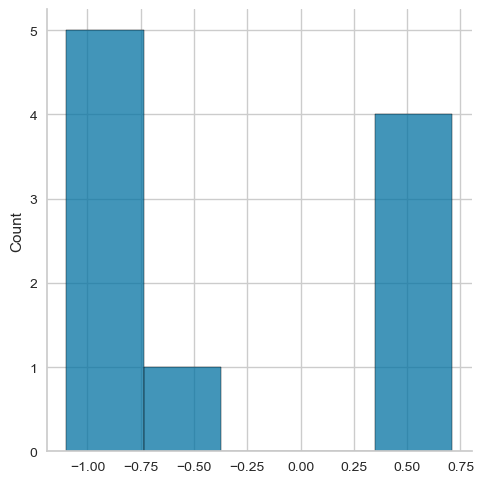

In [95]:
sns.displot(agr_skew)
agr_skew.describe()

### Conscientiousness skew data

In [74]:
#conscientiousness skew
csn_skew = skew_data[30:40]
csn_skew

CSN1    -0.470776
CSN2    -0.029610
CSN3    -1.063218
CSN4     0.273903
CSN5     0.260955
CSN6     0.111747
CSN7    -0.781714
CSN8     0.280073
CSN9    -0.287715
CSN10   -0.595496
dtype: float64

count    10.000000
mean     -0.343761
std       0.944866
min      -1.368370
25%      -1.050747
50%      -0.760998
75%       0.542728
max       1.157433
dtype: float64

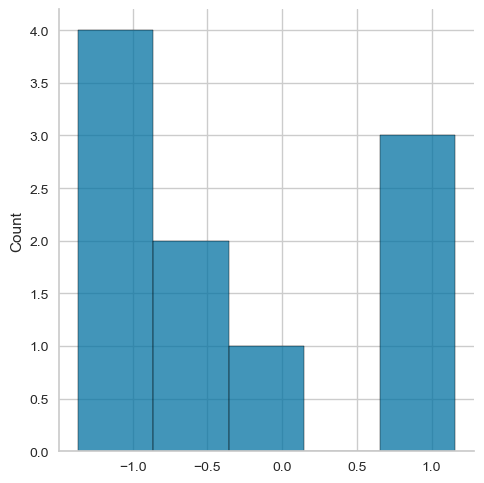

In [96]:
sns.displot(csn_skew)
csn_skew.describe()

### Openess skew data

In [97]:
#openess skew
opn_skew = skew_data[40:50]
opn_skew

OPN1    -0.711990
OPN2     0.811215
OPN3    -1.087772
OPN4     0.892810
OPN5    -0.810007
OPN6     1.157433
OPN7    -1.118518
OPN8    -0.262734
OPN9    -1.368370
OPN10   -0.939672
dtype: float64

count    10.000000
mean     -0.343761
std       0.944866
min      -1.368370
25%      -1.050747
50%      -0.760998
75%       0.542728
max       1.157433
dtype: float64

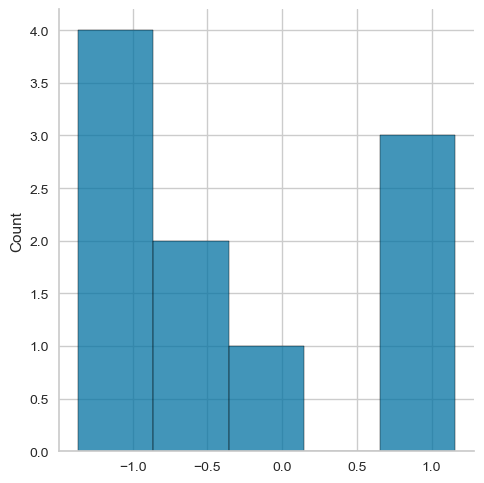

In [85]:
sns.displot(opn_skew)
opn_skew.describe()

#### For statistical comparison, I will take the mean skew from each trait to compare them side by side:
##### This allows me to get a mean value of skewness across 10 questions within each trait. 

In [100]:
print('The Extroversion SKEW mean is', ext_skew.mean()) 
print('The Neuroticism SKEW mean is', est_skew.mean())
print('The Agreeableness SKEW mean is', agr_skew.mean())
print('The Conscientiousness SKEW mean is', csn_skew.mean())
print('The Openness SKEW mean is', opn_skew.mean())

#where Extroversion is clostest to 0, and Openness is the most extreme

The Extroversion SKEW mean is -0.08087238835497879
The Neuroticism SKEW mean is -0.10178387895377945
The Agreeableness SKEW mean is -0.2519099368055865
The Conscientiousness SKEW mean is -0.3437606126795737
The Openness SKEW mean is -0.3437606126795737


- higher the value (of the extremes - so higher on the positive or lower on the negative), better the skew of data
- lower the value (the closer to 0), data is less skewed

Interesting how all of these fall into negative. 

Visually I would argue that agreeableness looks like the best skewed data due to there being high counts on either side of the plot without counts in the middle, followed by conscientiousness and openess. 

Statistically, we can see that extroversion, though negative, is the closest to 0, meaning that it has the best overall skew of data. (There are evenly low value answers and higher value answers given in regards to the questions asked). This would suggest that there is the most minimal bias in the Extroversion questions. 

Equally, this would mean that, due to the most negative values of skew given here; conscientiousness and openess have the most negative skew. This would suggest that there may be more bias in the questions. 